# Convolutional neural network

## Parameters

In [687]:
import torch

sobel_filter = torch.tensor([
    [1.0, 0, -1.0],
    [2.0, 0, -2.0],
    [1.0, 0.0, -1.0]
])

bias = 0.0

## Random image (1, 1, 9, 9)

each value is within the range of 0-1

In [688]:
matrix_order = 9
image = torch.rand(1, 1, matrix_order, matrix_order)

print(image)

tensor([[[[0.0131, 0.2436, 0.7375, 0.0201, 0.4957, 0.5943, 0.3517, 0.8907,
           0.0557],
          [0.9975, 0.9948, 0.4066, 0.0433, 0.7265, 0.4460, 0.8014, 0.5753,
           0.8906],
          [0.5396, 0.8340, 0.1817, 0.9007, 0.6860, 0.1490, 0.4065, 0.7976,
           0.9870],
          [0.4624, 0.0023, 0.9720, 0.8061, 0.5320, 0.5951, 0.3183, 0.7759,
           0.0590],
          [0.0475, 0.3176, 0.1126, 0.3167, 0.0307, 0.3986, 0.6151, 0.7535,
           0.4398],
          [0.9100, 0.1808, 0.8795, 0.4073, 0.9762, 0.0901, 0.9992, 0.9032,
           0.0250],
          [0.2747, 0.2049, 0.0662, 0.7201, 0.1778, 0.0537, 0.1128, 0.1078,
           0.3862],
          [0.5770, 0.0531, 0.8664, 0.5753, 0.8156, 0.0450, 0.0343, 0.7499,
           0.6016],
          [0.9299, 0.4688, 0.1762, 0.3874, 0.0889, 0.7472, 0.5027, 0.9279,
           0.3776]]]])


## Convolution with the default parameters

The result has the dimension:
$$n_{new}={n-f}+1$$

- **n** - order of the input tensor
- **f** - order of the filter

In [689]:
import torch.nn as nn

cnn = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3)
cnn.state_dict()["weight"][0][0] = sobel_filter
cnn.state_dict()["bias"][0] = bias

z = cnn(image)
print(z)

tensor([[[[ 0.8152,  2.0598, -0.9022, -0.6279,  0.2737, -1.2036, -0.4630],
          [ 0.7971,  0.0144, -0.8884,  1.3116,  0.6978, -1.6072, -0.9910],
          [-0.7264, -1.6735,  0.4575,  1.0917,  0.1226, -1.3650,  0.1135],
          [-0.6094, -1.0286,  0.5070,  0.3645, -0.9780, -1.7037,  1.5842],
          [ 0.2043, -0.9673, -0.2230,  1.2189, -0.5655, -2.0351,  1.8502],
          [ 0.1581, -1.7791, -0.2689,  2.1802,  0.8882, -1.6260, -0.1401],
          [ 0.3834, -1.4783,  0.0774,  1.3671,  1.2138, -1.6444, -1.2830]]]],
       grad_fn=<ConvolutionBackward0>)


## Convolution with the stride=2

stride=2 leads to:
- horizontal move - move 2 values right each time
- vertical mode - move 2 values down after finishing row

The result has the dimension:
$$n_{new}=\dfrac{n-f}{s}+1$$

- **n** - order of the input tensor
- **f** - order of the filter
- **s** - stride

In [690]:
cnn_stride2 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2)
cnn_stride2.state_dict()["weight"][0][0] = sobel_filter
cnn_stride2.state_dict()["bias"][0] = 0.0

z_stride2 = cnn_stride2(image)
print(z_stride2)

tensor([[[[ 0.8152, -0.9022,  0.2737, -0.4630],
          [-0.7264,  0.4575,  0.1226,  0.1135],
          [ 0.2043, -0.2230, -0.5655,  1.8502],
          [ 0.3834,  0.0774,  1.2138, -1.2830]]]],
       grad_fn=<ConvolutionBackward0>)


## Convolution with the stride=2 and padding=1

The result has the dimension:
$$n_{new}=\dfrac{n+2p-f}{s}+1$$

- **n** - order of the input tensor
- **f** - order of the filter
- **s** - stride
- **p** - padding

In [691]:
cnn_stride2_padding1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=2, padding=1)
cnn_stride2_padding1.state_dict()["weight"][0][0] = sobel_filter
cnn_stride2_padding1.state_dict()["bias"][0] = 0.0

z_stride2_padding1 = cnn_stride2_padding1(image)
print(z_stride2_padding1)

tensor([[[[-1.4820,  1.3984, -1.5509, -0.7221,  2.3567],
          [-2.6651,  0.0144,  1.3116, -1.6072,  2.9464],
          [-0.8182, -1.0286,  0.3645, -1.7037,  3.1860],
          [-0.6437, -1.7791,  2.1802, -1.6260,  1.8686],
          [-0.9906, -0.3595, -0.1893, -1.0663,  2.6057]]]],
       grad_fn=<ConvolutionBackward0>)


## Padding visualization


In [692]:
import torch.nn.functional as F

padded_image = F.pad(image, (1, 1, 1, 1))  # (left, right, top, bottom)
print(padded_image)

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000],
          [0.0000, 0.0131, 0.2436, 0.7375, 0.0201, 0.4957, 0.5943, 0.3517,
           0.8907, 0.0557, 0.0000],
          [0.0000, 0.9975, 0.9948, 0.4066, 0.0433, 0.7265, 0.4460, 0.8014,
           0.5753, 0.8906, 0.0000],
          [0.0000, 0.5396, 0.8340, 0.1817, 0.9007, 0.6860, 0.1490, 0.4065,
           0.7976, 0.9870, 0.0000],
          [0.0000, 0.4624, 0.0023, 0.9720, 0.8061, 0.5320, 0.5951, 0.3183,
           0.7759, 0.0590, 0.0000],
          [0.0000, 0.0475, 0.3176, 0.1126, 0.3167, 0.0307, 0.3986, 0.6151,
           0.7535, 0.4398, 0.0000],
          [0.0000, 0.9100, 0.1808, 0.8795, 0.4073, 0.9762, 0.0901, 0.9992,
           0.9032, 0.0250, 0.0000],
          [0.0000, 0.2747, 0.2049, 0.0662, 0.7201, 0.1778, 0.0537, 0.1128,
           0.1078, 0.3862, 0.0000],
          [0.0000, 0.5770, 0.0531, 0.8664, 0.5753, 0.8156, 0.0450, 0.0343,
           0.7499, 0.6016, 0.0000],
 

## Visualization

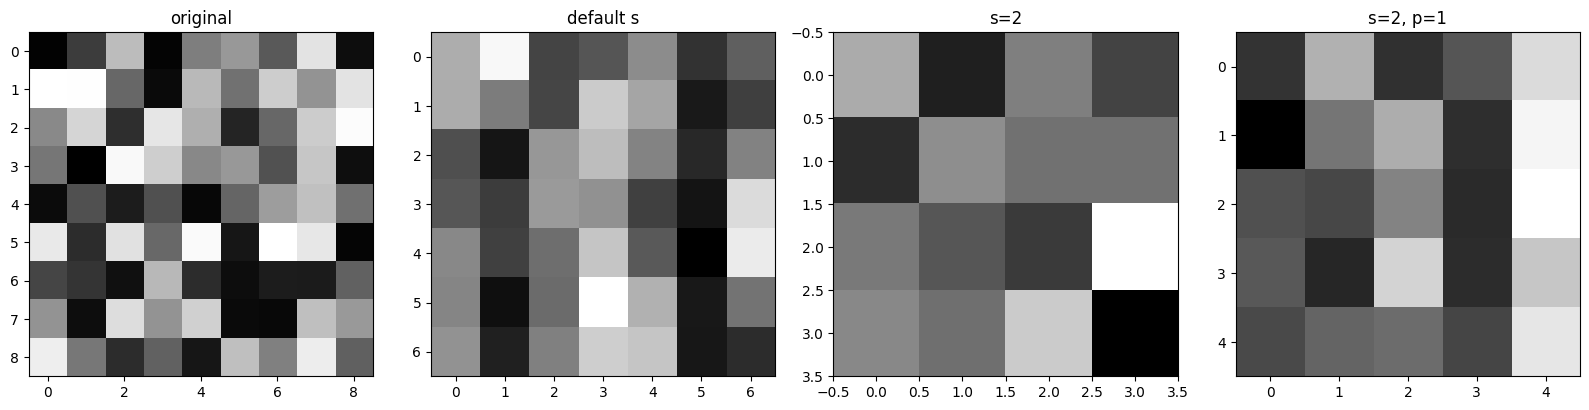

In [693]:
from matplotlib import pyplot as plt

images = [image, z, z_stride2, z_stride2_padding1]
labels = ["original", "default s", "s=2", "s=2, p=1"]

n = len(images)
fig, axes = plt.subplots(1, n, figsize=(4 * n, 4))

na_stride2 = z.squeeze().detach().numpy()
plt.imshow(na_stride2, cmap="gray")

for ax, i, l in zip(axes, images, labels):
    img_np = i.squeeze().detach().numpy()
    ax.imshow(img_np, cmap="gray")
    ax.set_title(l)

plt.tight_layout()
plt.show()